# Starter Classes

These are classes that will be used throughout the project. 

In [1]:
#All neccesary classes for project

#general
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as ss

#for preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion

#for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#for utility packages
from Utilities.utilities import import_data
from Utilities.utilities import DataFrameSelector
from Utilities.utilities import CategoricalEncoder
from Utilities.utilities import display_scores

# Import Data

Here we will import the data, view it, and scale it as well as impute missing values

In [12]:
#Get Data

raw_data = import_data("richard_rppa_labeled_raw2.csv", "C:/Users/sdgeo/Dropbox/Der Lab/Data/RichardRPPA/raw_data")
#raw_data_subsets = import_data("protein_list_final_final.csv")

raw_data = raw_data.drop("Unnamed: 0", axis=1).drop("replicate", axis=1)
raw_data["treatment"] = raw_data["target"] + raw_data["construct"]
cols = list(raw_data)
cols.insert(1, cols.pop(cols.index('treatment')))
raw_data = raw_data.ix[:, cols]
raw_data

c:\users\sdgeo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


,cell.line,treatment,target,construct,time,cAbl.Y245,Acetyl.CoA.Carboxylase.S79,AKT.S473,AKT.T308,ATM.S1981,...,Stat6.Y641,TAB2.S372,Tuberin.TSC2.Y1571,VASP.S157,Vav3.Y173,VEGFR.2.Y1175,Zap70.Y319.Syk.Y352,p70S6.Kinase,Vimentin,Rb.Total
0,Pa02C,KRAS_NS,KRAS_,NS,24,12406.795700,17623.709890,2895.752232,12887.327570,8973.223334,...,13932.782800,20723.013600,23155.79126,8708.018526,20599.037100,14661.795030,8217.324422,8839.626408,1026.592162,22471.44021
1,Pa02C,KRAS_si1,KRAS_,si1,24,11510.326090,15646.460310,2134.526005,5110.229313,8160.004256,...,16010.495520,22247.840550,21741.98506,6522.415047,17854.305490,14086.898360,6627.611662,7684.799377,896.053265,21504.12018
2,Pa02C,KRAS_si2,KRAS_,si2,24,11719.394930,17623.709890,7879.345508,3681.223477,12016.068240,...,15662.120930,21547.168340,20619.65478,9681.774215,15756.369290,13863.291170,6535.471984,7646.477698,709.811937,20910.35886
3,Pa02C,KRAS_NS,KRAS_,NS,24,11407.199930,15898.813880,7480.089800,7398.262074,6476.917767,...,14100.984560,21439.698930,20557.88318,9367.489950,17606.087870,14129.212700,9376.856974,8030.484774,1164.445099,21741.98506
4,Pa02C,KRAS_si1,KRAS_,si1,24,12619.516710,15568.421490,11849.016110,6317.004507,9996.597241,...,16432.227530,22697.265480,19970.27960,9395.628092,17085.753900,14632.488910,7585.547076,7715.605256,923.342343,20434.91407
5,Pa02C,KRAS_si2,KRAS_,si2,24,12797.431670,17925.860540,7244.512282,6620.991001,9461.627931,...,16187.593410,21850.948870,18958.36203,8459.118249,14185.852150,13794.146130,6721.050363,6904.993694,790.764231,20070.36420
6,Pa02C,KRAS_NS,KRAS_,NS,24,11114.434910,28001.119520,27722.497380,6884.307969,10456.720020,...,13333.036010,20723.013600,23388.51619,14457.960960,20272.079350,14617.871760,8919.540562,8955.296120,1036.909328,22247.84055
7,Pa02C,KRAS_si1,KRAS_,si1,24,11968.103440,25336.475180,15002.920720,4628.553042,7863.603705,...,15138.553790,20455.347960,21461.15803,10689.320390,17535.809260,14472.418200,7339.309348,7934.694180,911.416568,21611.91251
8,Pa02C,KRAS_si2,KRAS_,si2,24,12136.834520,25336.475180,14400.235060,6904.993694,9779.070576,...,14559.521290,20475.821820,20619.65478,9662.422203,15584.004000,13918.864620,5925.381041,7244.512282,644.194008,19890.54483
9,Pa02C,KRAS_NS,KRAS_,NS,24,11591.180680,24834.767990,27173.568630,9798.646868,6904.993694,...,13095.180520,18939.405490,23623.55756,14764.787200,19110.626140,14691.145830,9847.763916,8777.965357,1124.394666,22026.46579


In [3]:
# Transform Data to proper scale 

#Isolate attributes based on numbers or objects

num_attribs = list(raw_data.select_dtypes([np.number]))
cat_attribs = list(raw_data.select_dtypes([object]))

#Define a pipeline for dealing with each type of attribute
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    #('std_scaler', StandardScaler()),
])


cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
])

#establish a pipeline

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline)
])

#If it contains non-numeric features, make that part of the pipeline.

if(len(cat_attribs) != 0):
    full_pipeline = FeatureUnion(transformer_list=[
        ("first_pipeline", full_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

#Transform input data

raw_data_parsed = full_pipeline.fit_transform(raw_data)


#Store the attributes for each. Add categorical ones if need be

attributes = num_attribs

if(len(cat_attribs) != 0):
    cat_encoder = cat_pipeline.named_steps["cat_encoder"]
    cat_one_hot_attribs = list(cat_encoder.categories_[0])
    attributes = attributes + cat_one_hot_attribs

#Build a data frame for the test and train data

cleaned_data = pd.DataFrame(raw_data_parsed, columns=attributes)

#Visualize training data to ensure good split and proper encoding

cleaned_data

,time,sch,ly3,Acetyl.CoA.S79,Akt.S473,Akt.T308,ATM.S1981,BAD.S112,c.Abl.Y245,Cleaved.Caspase.9.D315,...,Ras.GRF1.S916,Rb.S780,RSK3.T356.360,S6.Ribosomal.protein.S235.236,S6.Ribosomal.Protein.S240.244,MARCKS.S152.156,MIA PaCa-2,Pa02C,Pa14C,Pa16C
0,0.25,0.0,0.0,100710.008000,2190.751495,6406.064145,3793.332410,5756.011077,14957.97552,19110.626140,...,8866.187405,24587.652290,22925.382040,7354.001589,19283.394700,9330.088637,1.0,0.0,0.0,0.0
1,0.25,0.0,300.0,62943.966610,1835.367231,5955.082819,6348.663296,5297.550428,16797.74771,19264.131520,...,7762.034672,20785.281380,16564.218780,2032.455817,7502.565710,4027.896834,1.0,0.0,0.0,0.0
2,0.25,40.0,0.0,76879.919760,2266.517592,7273.553192,5978.949121,11047.952760,14691.14583,18434.875370,...,8030.484774,20394.088040,17588.483470,5508.239386,15168.859000,8127.431788,1.0,0.0,0.0,0.0
3,0.25,40.0,300.0,66836.168440,2721.667220,8250.257154,7855.740856,5967.004037,12468.98644,20312.661140,...,8217.324422,19187.234470,20640.293090,6425.306732,15063.048210,8569.800701,1.0,0.0,0.0,0.0
4,0.25,0.0,0.0,56954.034500,20973.189560,15214.437850,9623.852501,16881.948700,14086.89836,11766.362980,...,19830.976380,19034.341830,18939.405490,19732.066710,30333.248340,9537.628101,0.0,1.0,0.0,0.0
5,0.25,0.0,300.0,44801.640590,24343.018710,16090.750300,8612.757991,21547.168340,14058.74135,18342.946430,...,19811.147300,16203.780200,25591.092440,15490.771890,27173.568630,10970.887470,0.0,1.0,0.0,0.0
6,0.25,40.0,0.0,77652.593580,21015.174870,15803.713470,9740.035245,25848.293120,15367.34901,19516.191050,...,20619.654780,17712.034240,24343.018710,28566.792730,32532.678110,13561.637900,0.0,1.0,0.0,0.0
7,0.25,40.0,300.0,53103.606000,15756.369290,11452.916790,4027.896834,20150.819810,17309.31067,15244.894960,...,19225.644550,16203.780200,17535.809260,20516.811470,30333.248340,10239.419480,0.0,1.0,0.0,0.0
8,0.25,0.0,0.0,26108.078760,2409.079924,5773.306535,4319.955110,25084.367300,13904.94709,15994.501810,...,6781.811647,13711.635020,18564.389340,24834.767990,30638.109570,12977.854940,0.0,0.0,1.0,0.0
9,0.25,0.0,300.0,24587.652290,2667.774649,5382.991843,4518.793743,25591.092440,14157.49735,18124.144980,...,6870.554108,13932.782800,16983.537490,26108.078760,32859.613140,10796.742020,0.0,0.0,1.0,0.0


# Ready for Plotting and Graphing

Here you can use can visualize data and do any number of correlation matricies etc. 

Cleaned data item:
cleaned_data

In [106]:
cleaned_data.to_csv('imputed_csv_sam.csv', sep=',')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 164 entries, time to Pa16C
dtypes: float64(164)
memory usage: 512.6 KB


In [155]:
cleaned_data = cleaned_data.loc[cleaned_data['ly3'] > 1,:]
cleaned_data = cleaned_data.drop('ly3', axis=1)
cleaned_data = pd.DataFrame(cleaned_data)

In [143]:
cleaned_data.describe()

,time,sch,ly3,Acetyl.CoA.S79,Akt.S473,Akt.T308,ATM.S1981,BAD.S112,c.Abl.Y245,Cleaved.Caspase.9.D315,...,Ras.GRF1.S916,Rb.S780,RSK3.T356.360,S6.Ribosomal.protein.S235.236,S6.Ribosomal.Protein.S240.244,MARCKS.S152.156,MIA PaCa-2,Pa02C,Pa14C,Pa16C
count,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,21.050000,20.000000,300.0,16390.132549,13650.616455,11883.612236,7087.157061,15603.438994,13980.083189,16707.172887,...,13622.919342,15793.299449,11661.647892,9561.463419,14136.194928,7785.315064,0.250000,0.250000,0.250000,0.250000
std,26.935807,20.050188,0.0,15446.583784,14778.551694,7349.021372,2354.226404,6757.427717,2182.470117,3899.021425,...,8055.354047,5465.747697,8390.128285,10166.012758,9732.207173,4348.758099,0.434099,0.434099,0.434099,0.434099
min,0.250000,0.000000,300.0,2226.086039,1311.595876,2910.266196,0.000045,4372.107223,8416.927257,6173.367087,...,4861.004197,4774.286023,1525.381656,17.030401,381.839427,746.951439,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,300.0,5280.374316,2359.617295,7040.961861,5644.858163,10357.857617,12382.030215,13598.977432,...,7282.655434,11849.084295,4959.387062,1906.818268,5898.529860,4791.072355,0.000000,0.000000,0.000000,0.000000
50%,8.000000,20.000000,300.0,10535.738385,6155.183807,8901.729293,7208.613402,13794.180310,13974.892415,16424.020030,...,9674.530754,15191.648425,8809.060154,6792.000521,14321.398500,7270.243915,0.000000,0.000000,0.000000,0.000000
75%,24.000000,40.000000,300.0,22870.078158,21211.340435,14820.421745,8612.757991,19692.626090,15317.554775,19443.151810,...,19609.208592,19225.644550,16551.796808,12648.038220,20318.074265,9523.336991,0.250000,0.250000,0.250000,0.250000
max,72.000000,40.000000,300.0,77652.593580,63576.578540,38948.661840,13739.083740,31571.170480,20660.932360,30333.248340,...,33860.360590,30031.449240,57526.445230,53637.318380,40945.610240,26370.475350,1.000000,1.000000,1.000000,1.000000


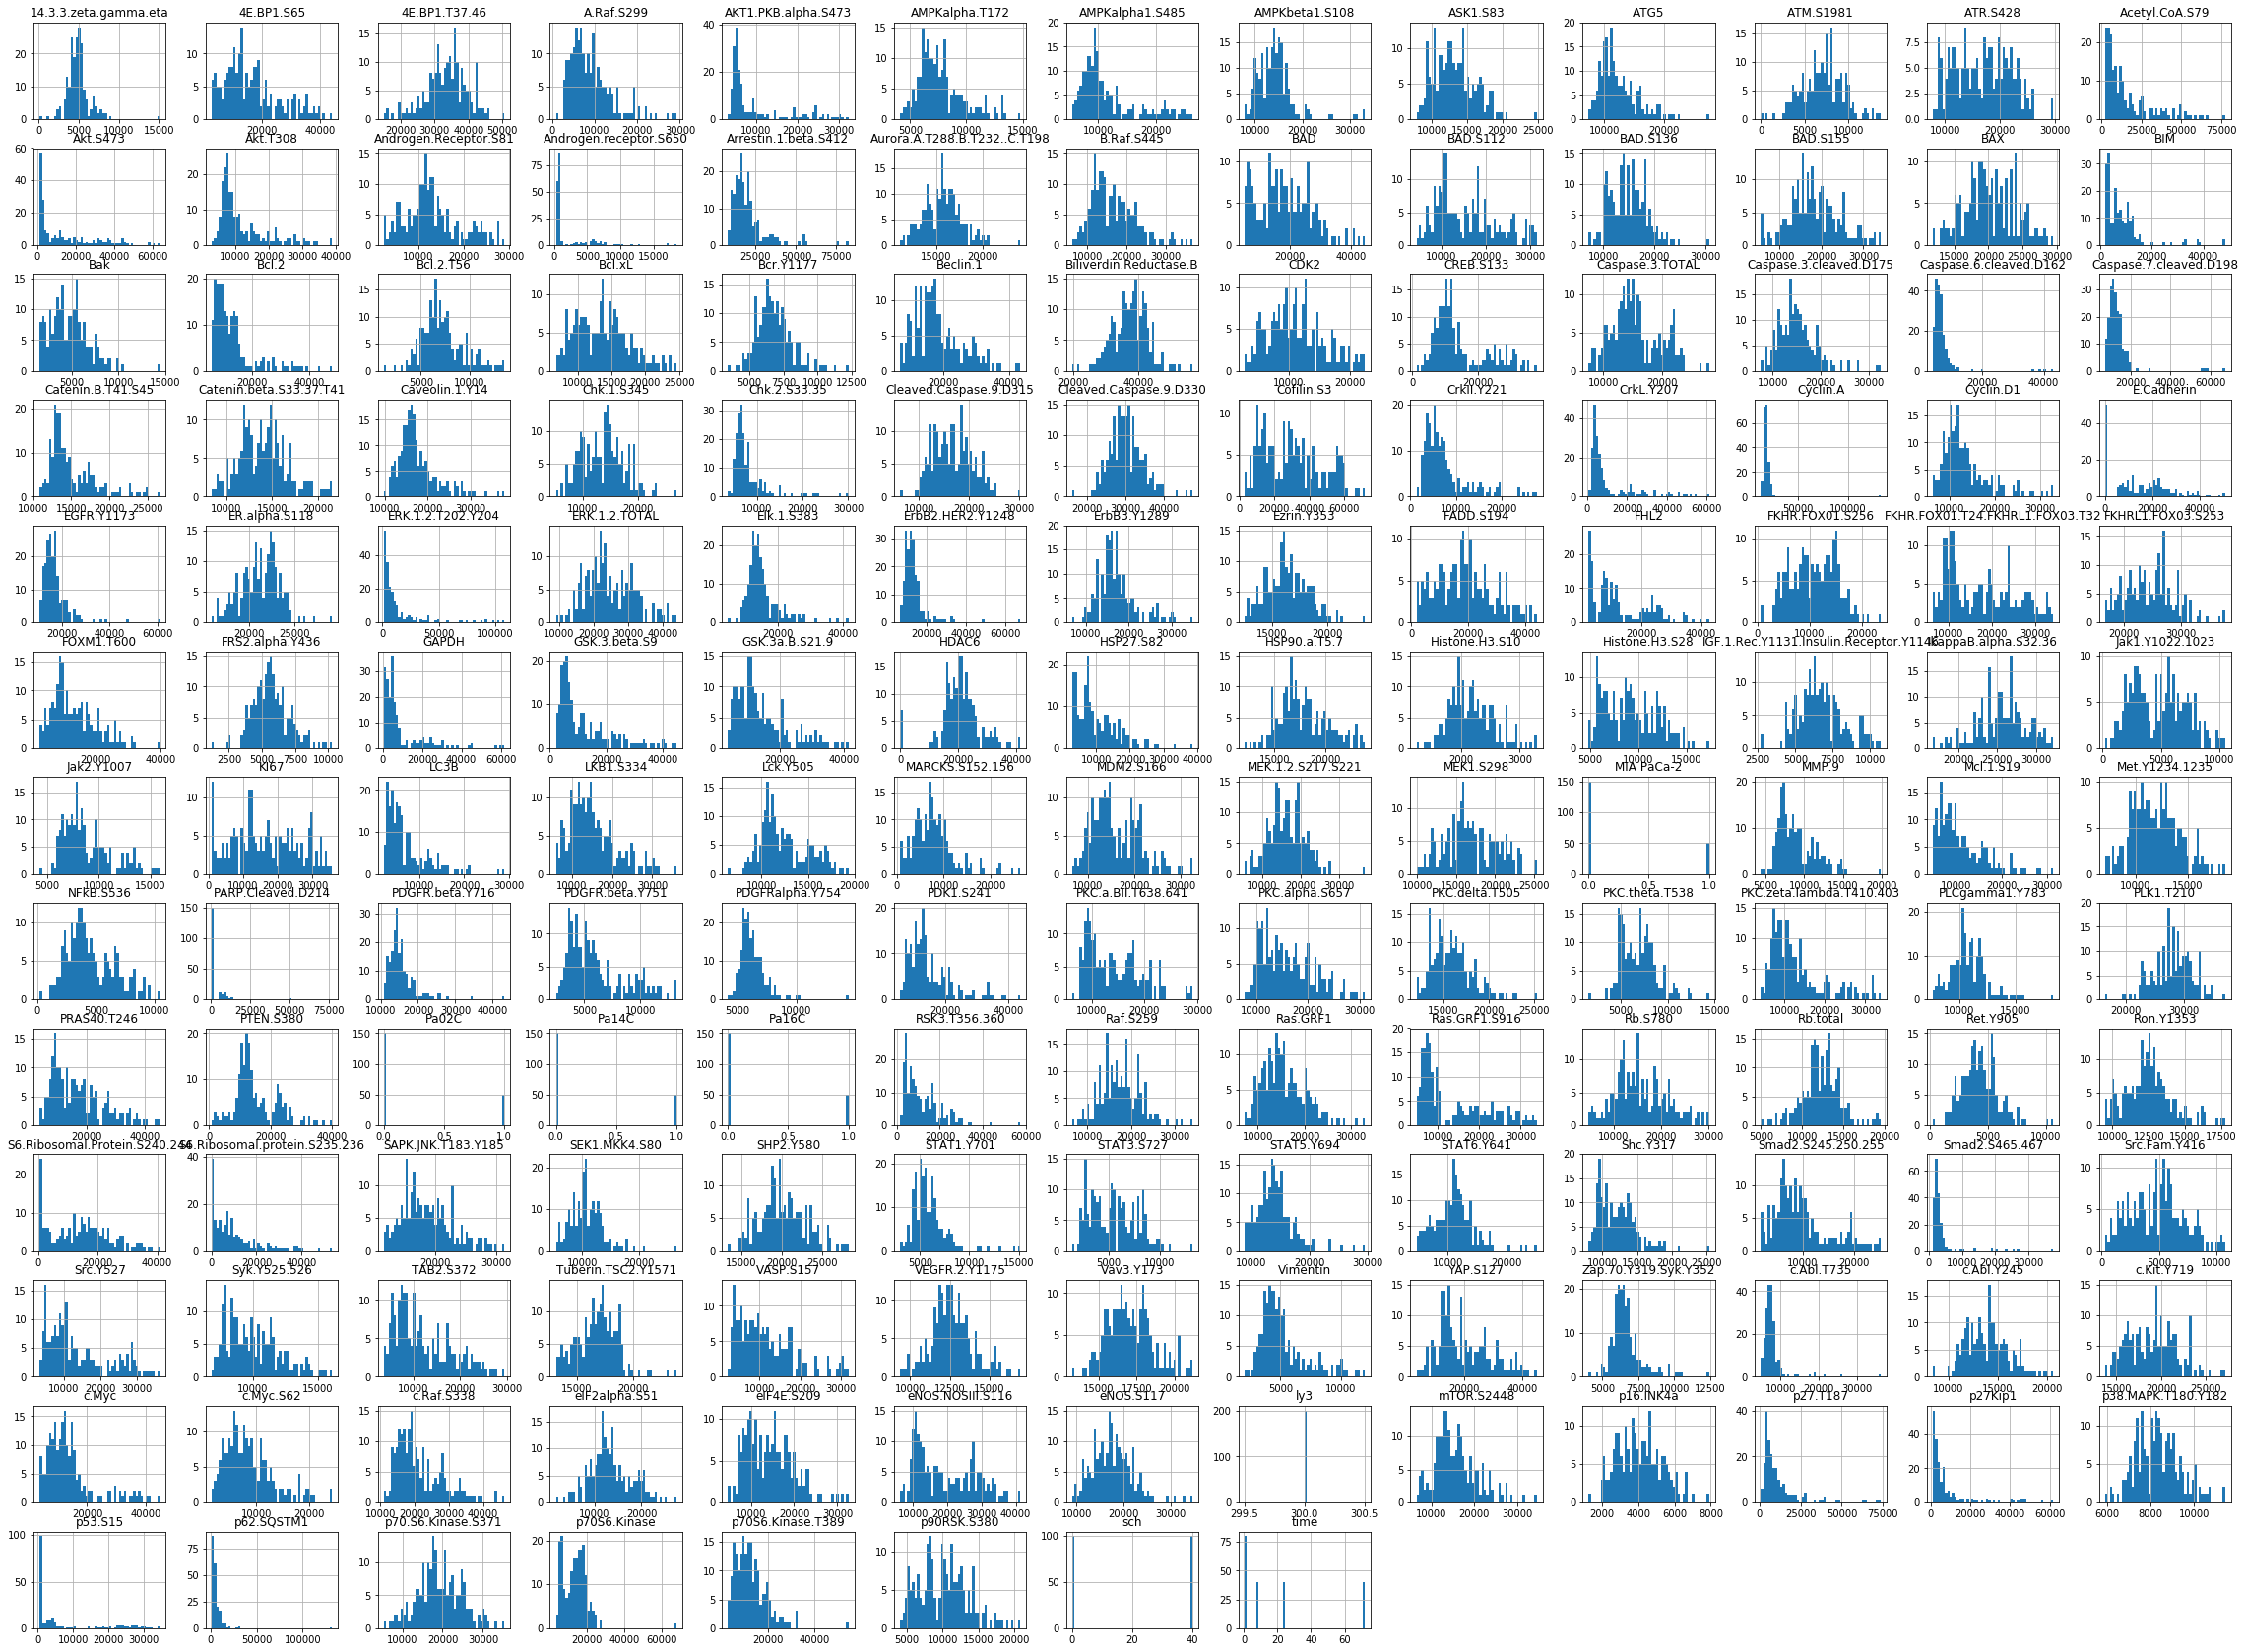

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_data.reindex(sorted(cleaned_data.columns), axis=1)
cleaned_data.hist(bins=50, figsize=(40,30))
plt.show()

In [156]:
corr_matrix = cleaned_data.corr()

In [157]:
corr_matrix_spear = cleaned_data.corr(method='spearman')
corr_matrix_spear.reindex(sorted(corr_matrix_spear.columns), axis=1)
pvalue_matrix_spear = pd.DataFrame(ss.spearmanr(cleaned_data).pvalue)
corr_matrix_spear

,time,sch,Acetyl.CoA.S79,Akt.S473,Akt.T308,ATM.S1981,BAD.S112,c.Abl.Y245,Cleaved.Caspase.9.D315,Cleaved.Caspase.9.D330,...,Ras.GRF1.S916,Rb.S780,RSK3.T356.360,S6.Ribosomal.protein.S235.236,S6.Ribosomal.Protein.S240.244,MARCKS.S152.156,MIA PaCa-2,Pa02C,Pa14C,Pa16C
time,1.000000,0.000000,-0.279646,-0.129520,-0.128723,0.265009,-0.115099,-0.171316,-0.059035,0.179947,...,-0.004134,-0.348448,-0.731124,-0.632009,-0.656049,-0.178847,0.000000,0.000000,0.000000,0.000000
sch,0.000000,1.000000,-0.018187,0.000953,0.091281,-0.017148,-0.012125,0.083574,0.033170,-0.104324,...,0.041137,-0.099335,-0.289690,-0.194426,-0.216511,0.065819,0.000000,0.000000,0.000000,0.000000
Acetyl.CoA.S79,-0.279646,-0.018187,1.000000,-0.347599,0.009782,0.115749,-0.063236,-0.061194,0.289271,0.312526,...,-0.223672,0.443371,0.423196,-0.046132,-0.075467,0.570590,0.709016,0.152103,-0.209205,-0.651915
Akt.S473,-0.129520,0.000953,-0.347599,1.000000,0.722273,-0.071207,0.609722,0.591868,-0.133859,-0.138035,...,0.832504,0.202896,0.062516,0.259647,0.306142,-0.057698,-0.621213,0.656214,-0.374208,0.339207
Akt.T308,-0.128723,0.091281,0.009782,0.722273,1.000000,0.122955,0.524774,0.696191,0.100645,0.114890,...,0.773450,0.520000,0.174985,0.120620,0.136873,0.309525,-0.250504,0.703812,-0.435907,-0.017400
ATM.S1981,0.265009,-0.017148,0.115749,-0.071207,0.122955,1.000000,-0.207126,0.115512,0.385774,0.322571,...,-0.008513,-0.049948,-0.181154,-0.345809,-0.321888,-0.037335,0.339907,-0.168403,-0.363207,0.191704
BAD.S112,-0.115099,-0.012125,-0.063236,0.609722,0.524774,-0.207126,1.000000,0.510310,-0.156898,0.012329,...,0.464736,0.307340,0.190910,0.410620,0.386586,0.283975,-0.534016,0.604919,0.176705,-0.247608
c.Abl.Y245,-0.171316,0.083574,-0.061194,0.591868,0.696191,0.115512,0.510310,1.000000,0.178459,0.104107,...,0.529451,0.258498,0.145592,0.113069,0.138078,0.129519,-0.249608,0.456714,-0.292609,0.085503
Cleaved.Caspase.9.D315,-0.059035,0.033170,0.289271,-0.133859,0.100645,0.385774,-0.156898,0.178459,1.000000,0.458225,...,0.055532,0.128983,0.165138,-0.096276,-0.052965,0.134847,0.307109,-0.064602,-0.257908,0.015400
Cleaved.Caspase.9.D330,0.179947,-0.104324,0.312526,-0.138035,0.114890,0.322571,0.012329,0.104107,0.458225,1.000000,...,-0.078848,0.113550,0.033569,-0.305967,-0.281040,0.130533,0.248629,0.122364,0.002101,-0.373094


In [ ]:
sns.set()

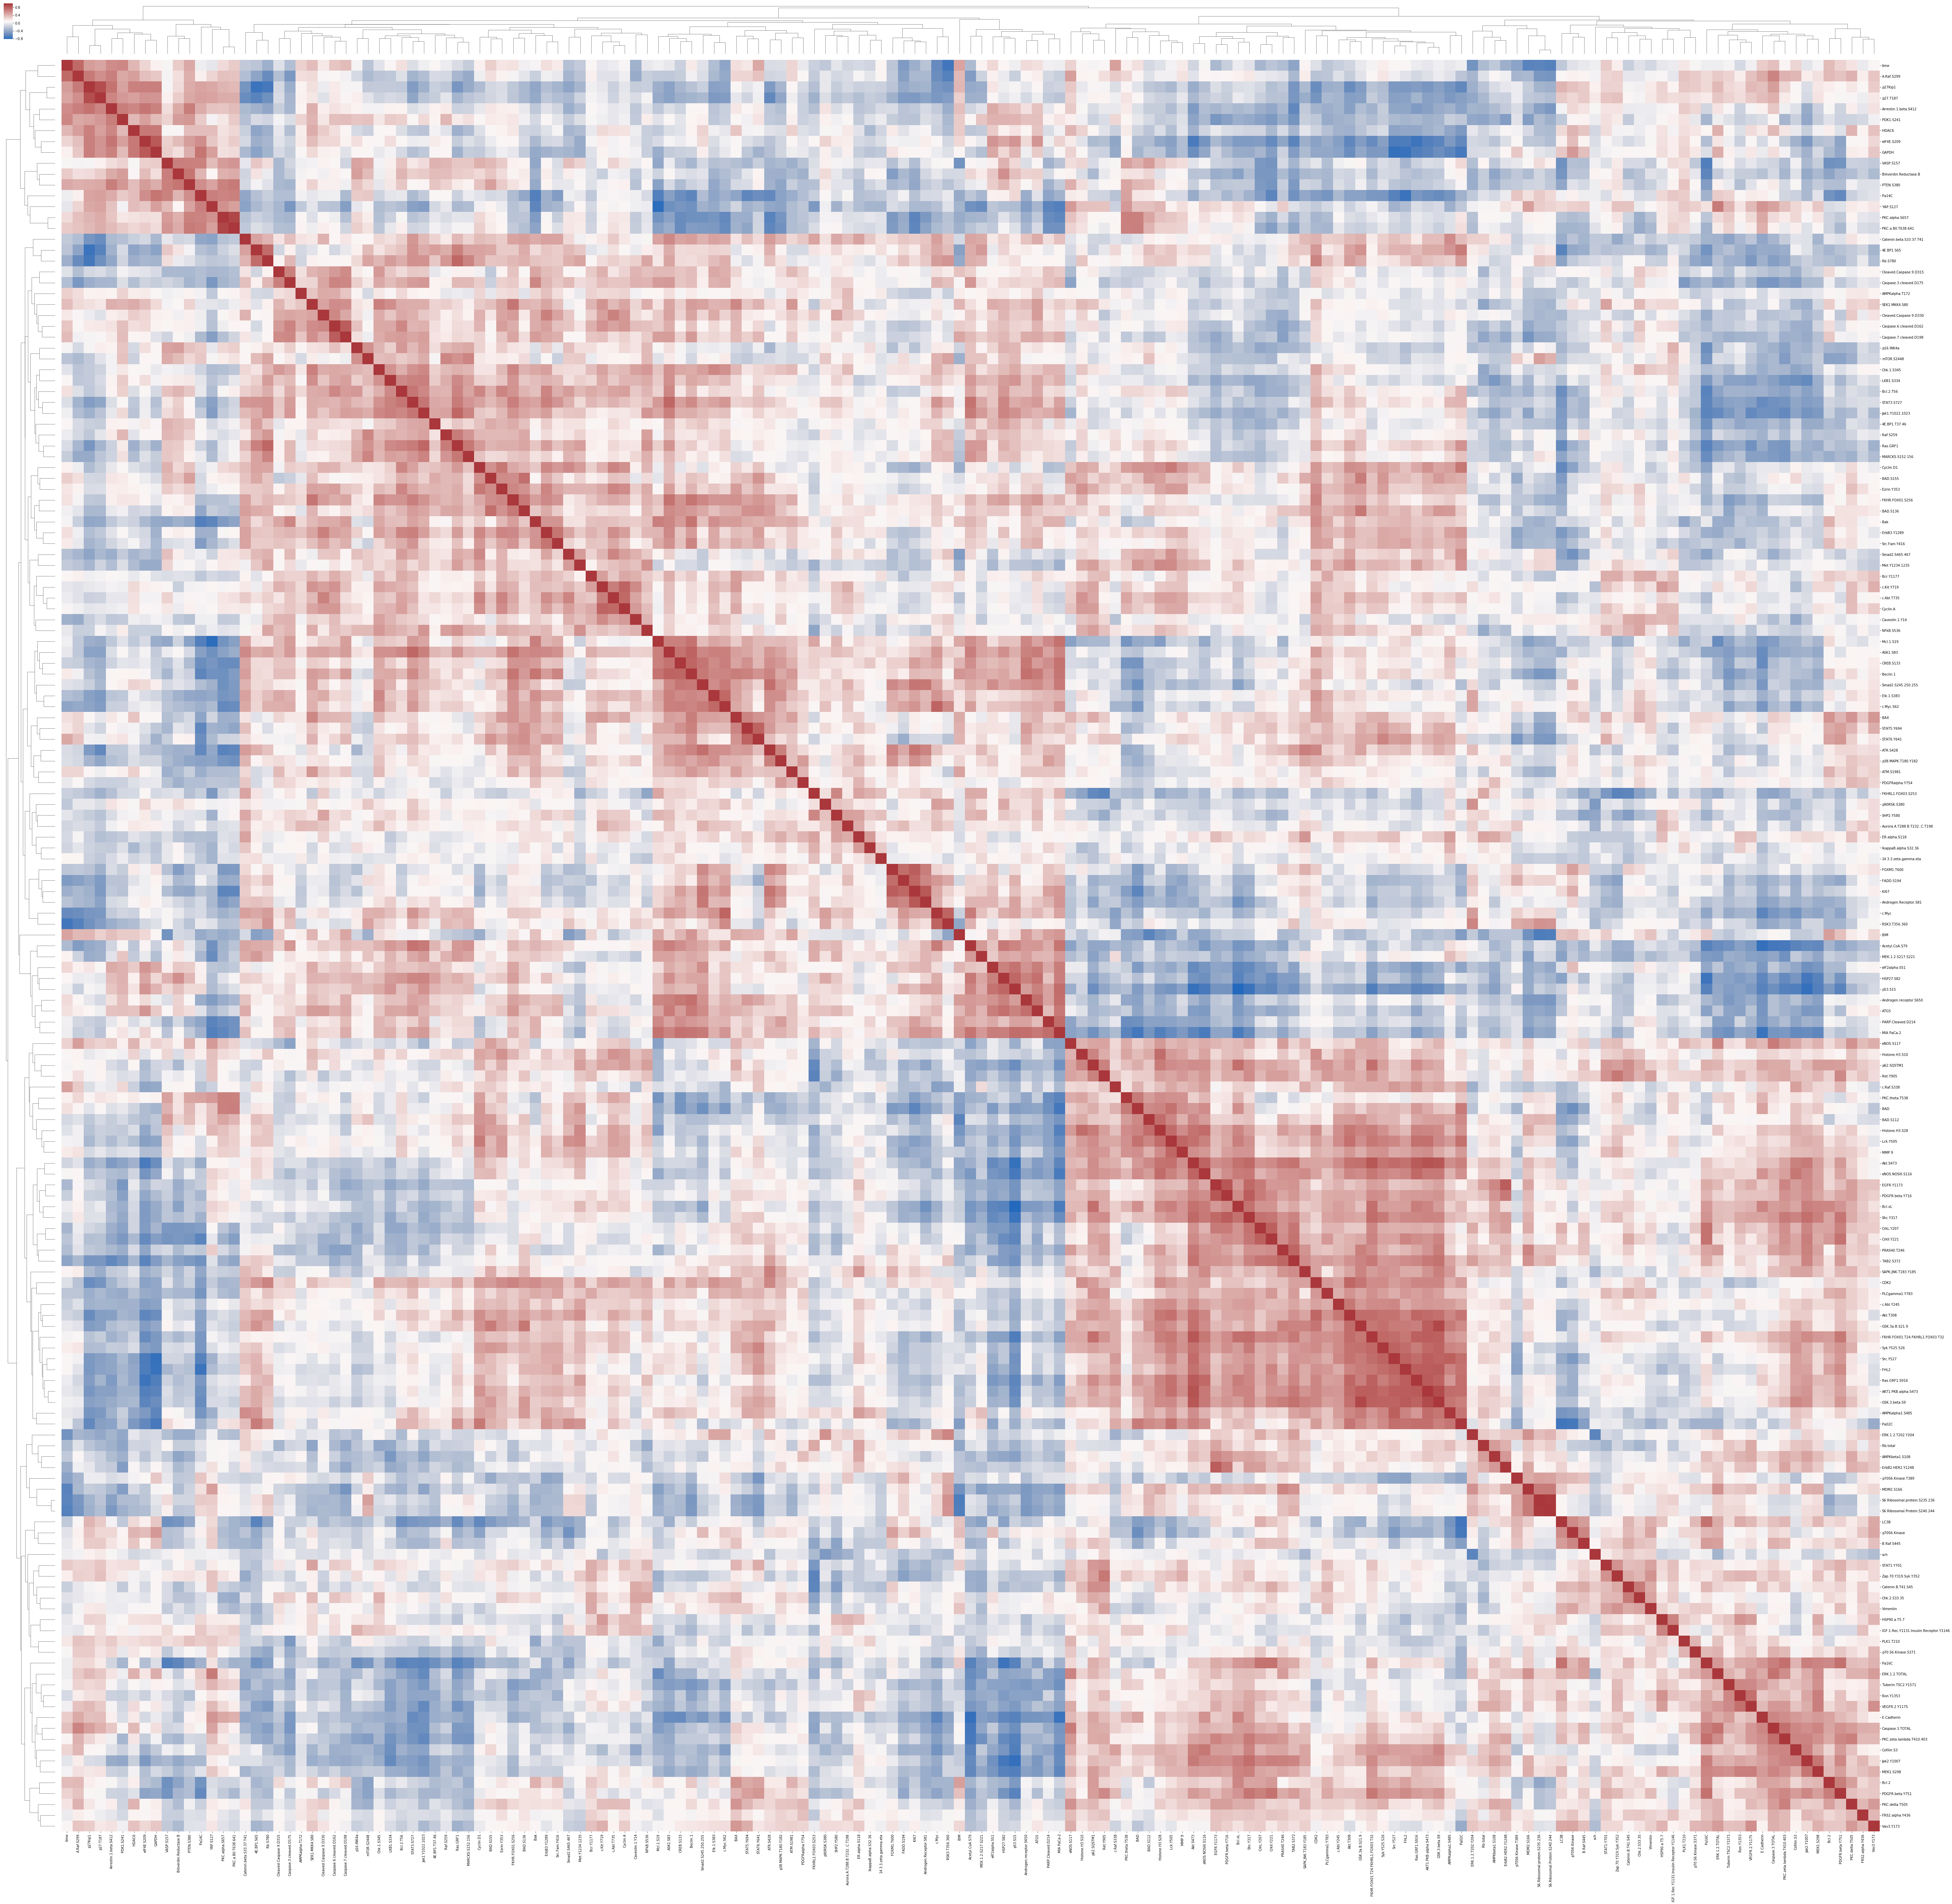

In [158]:

#color pallete used for all heatmaps
pls = sns.husl_palette(8, s=.45)

#overall cluster map
dims = (100, 100)
sns_whole = sns.clustermap(corr_matrix_spear, figsize=dims, cmap="vlag")
sns_whole.savefig("irem_whole.png", dpi = 'figure')

In [32]:
raw_data_subsets

,MAPK.AKT,RTKs,apoptosis,cell.cycle,cytoskeleton.actin.focal.adhesion,histone.DNA.transcription.translation,metabolism.autophagy,included.with.every.list
0,Akt.S473,Akt.S473,Akt.S473,ATM.S1981,c.Abl.Y245,CREB.S133,Acetyl.CoA.S79,ERK.1.2.T202.Y204
1,Akt.T308,Akt.T308,Akt.T308,c.Abl.Y245,Cofilin.S3,CrkL.Y207,FKHR.FOX01.T24.FKHRL1.FOX03.T32,ERK.1.2.TOTAL
2,c.Abl.Y245,ATM.S1981,ATM.S1981,Chk.1.S345,eNOS.NOSIII.S116,HDAC6,FKHR.FOX01.S256,p90RSK.S380
3,CREB.S133,c.Abl.Y245,BAD.S112,CDK2,Src.Fam.Y416,Histone.H3.S10,FKHRL1.FOX03.S253,RSK3.T356.360
4,CrkL.Y207,ErbB3.Y1289,c.Abl.Y245,Smad2.S465.467,Src.Y527,Histone.H3.S28,FOXM1.T600,c.Myc.S62
5,Elk.1.S383,ERK.1.2.T202.Y204,Cleaved.Caspase.9.D315,Smad2.S245.250.255.,c.Abl.T735,c.Myc.S62,Beclin.1,c.Myc
6,eNOS.NOSIII.S116,CDK2,Cleaved.Caspase.9.D330,c.Abl.T735,Bcr.Y1177,c.Myc,p62.SQSTM1,MEK1.S298
7,ErbB3.Y1289,SAPK.JNK.T183.Y185,ERK.1.2.T202.Y204,p16.INK4a,Catenin.beta.S33.37.T41,Smad2.S465.467,Biliverdin.Reductase.B,MEK.1.2.S217.S221
8,ERK.1.2.T202.Y204,SEK1.MKK4.S80,FADD.S194,PLK1.T210,Catenin.B.T41.S45,Smad2.S245.250.255.,AMPKalpha.T172,Akt.S473
9,c.Myc.S62,Src.Fam.Y416,FKHR.FOX01.T24.FKHRL1.FOX03.T32,KI67,Caveolin.1.Y14,YAP.S127,AMPKalpha1.S485,Akt.T308


In [159]:
vector_Core = raw_data_subsets["core"].dropna().reindex()

vector_MAPK = raw_data_subsets["MAPK.AKT"].dropna().reindex()
vector_MAPK = set(list(vector_MAPK) + list(vector_Core))
vector_MAPK = pd.DataFrame(list(vector_MAPK))
vector_MAPK = vector_MAPK[0]

vector_RTK = raw_data_subsets["RTKs"].dropna().reindex()
vector_RTK =  set(list(vector_RTK) + list(vector_Core))
vector_RTK = pd.DataFrame(list(vector_RTK))
vector_RTK = vector_RTK[0]

vector_Apoptosis = raw_data_subsets["apoptosis"].dropna().reindex()
vector_Apoptosis = set(list(vector_Apoptosis) + list(vector_Core))
vector_Apoptosis = pd.DataFrame(list(vector_Apoptosis))
vector_Apoptosis = vector_Apoptosis[0]

vector_Cell = raw_data_subsets["cell.cycle"].dropna().reindex()
vector_Cell = set(list(vector_Cell) + list(vector_Core))
vector_Cell = pd.DataFrame(list(vector_Cell))
vector_Cell = vector_Cell[0]

vector_Cytoskeleton = raw_data_subsets["cytoskeleton"].dropna().reindex()
vector_Cytoskeleton = set(list(vector_Cytoskeleton) + list(vector_Core))
vector_Cytoskeleton = pd.DataFrame(list(vector_Cytoskeleton))
vector_Cytoskeleton = vector_Cytoskeleton[0]

vector_DNA = raw_data_subsets["dna"].dropna().reindex()
vector_DNA = set(list(vector_DNA) + list(vector_Core))
vector_DNA = pd.DataFrame(list(vector_DNA))
vector_DNA = vector_DNA[0]

vector_Metabolism = raw_data_subsets["metabolism"].dropna().reindex()
vector_Metabolism = set(list(vector_Metabolism) + list(vector_Core))
vector_Metabolism = pd.DataFrame(list(vector_Metabolism))
vector_Metabolism = vector_Metabolism[0]

vector_MAPK

0                        STAT6.Y641
1             14.3.3.zeta.gamma.eta
2                         NFkB.S536
3                        A.Raf.S299
4                    PLCgamma1.Y783
5                  eNOS.NOSIII.S116
6                p70.S6.Kinase.S371
7                         c.Myc.S62
8                p38.MAPK.T180.Y182
9                          Raf.S259
10                        MEK1.S298
11                       EGFR.Y1173
12                    VEGFR.2.Y1175
13                       Elk.1.S383
14                       STAT5.Y694
15                    SEK1.MKK4.S80
16               PKC.a.BII.T638.641
17                       c.Abl.Y245
18         PKC.zeta.lambda.T410.403
19                     Syk.Y525.526
20                  MARCKS.S152.156
21                    RSK3.T356.360
22                    GSK.3.beta.S9
23                       c.Abl.T735
24                     p70S6.Kinase
25                       STAT1.Y701
26                    Ras.GRF1.S916
27                       c.R

In [160]:
to_plot_core = corr_matrix_spear.loc[vector_Core, vector_Core]
to_plot_mapk = corr_matrix_spear.loc[vector_MAPK, vector_MAPK]
to_plot_RTK = corr_matrix_spear.loc[vector_RTK, vector_RTK]
to_plot_apoptosis = corr_matrix_spear.loc[vector_Apoptosis, vector_Apoptosis]
to_plot_cell = corr_matrix_spear.loc[vector_Cell, vector_Cell]
to_plot_cytoskeleton = corr_matrix_spear.loc[vector_Cytoskeleton, vector_Cytoskeleton]
to_plot_dna = corr_matrix_spear.loc[vector_DNA, vector_DNA]
to_plot_metabolism = corr_matrix_spear.loc[vector_Metabolism, vector_Metabolism]

to_plot_core

,ERK.1.2.T202.Y204,ERK.1.2.TOTAL,p90RSK.S380,RSK3.T356.360,c.Myc.S62,c.Myc,MEK1.S298,MEK.1.2.S217.S221,Akt.S473,Akt.T308,AKT1.PKB.alpha.S473,A.Raf.S299,B.Raf.S445,c.Raf.S338,Raf.S259
ERK.1.2.T202.Y204,1.000000,0.354965,0.577908,0.632089,0.486518,0.520491,0.228123,-0.037878,0.214925,0.079606,0.178889,-0.311600,0.106039,-0.345467,-0.036314
ERK.1.2.TOTAL,0.354965,1.000000,0.138172,0.032704,-0.081966,-0.188158,0.599819,-0.506235,0.226568,-0.121034,0.032879,0.311639,0.509672,-0.067186,-0.095494
p90RSK.S380,0.577908,0.138172,1.000000,0.461524,0.356612,0.511059,-0.074061,0.205784,-0.168312,-0.157281,-0.102667,-0.029940,-0.151100,-0.338974,0.193509
RSK3.T356.360,0.632089,0.032704,0.461524,1.000000,0.604447,0.792689,-0.123760,0.132947,0.062516,0.174985,0.107151,-0.662512,0.055595,-0.396117,0.388417
c.Myc.S62,0.486518,-0.081966,0.356612,0.604447,1.000000,0.791846,-0.322227,0.213517,-0.117519,0.214735,0.055702,-0.392144,0.231644,-0.320235,0.296006
c.Myc,0.520491,-0.188158,0.511059,0.792689,0.791846,1.000000,-0.419257,0.359719,-0.203502,0.072514,-0.049461,-0.566292,-0.032484,-0.451581,0.353578
MEK1.S298,0.228123,0.599819,-0.074061,-0.123760,-0.322227,-0.419257,1.000000,-0.404452,0.515311,0.159906,0.333570,0.215026,0.257189,0.255993,-0.211317
MEK.1.2.S217.S221,-0.037878,-0.506235,0.205784,0.132947,0.213517,0.359719,-0.404452,1.000000,-0.203022,0.050204,0.069816,-0.143817,-0.304337,0.237899,0.421617
Akt.S473,0.214925,0.226568,-0.168312,0.062516,-0.117519,-0.203502,0.515311,-0.203022,1.000000,0.722273,0.878160,-0.048684,0.014483,0.432492,-0.048624
Akt.T308,0.079606,-0.121034,-0.157281,0.174985,0.214735,0.072514,0.159906,0.050204,0.722273,1.000000,0.758032,-0.178693,-0.087231,0.431935,0.256284


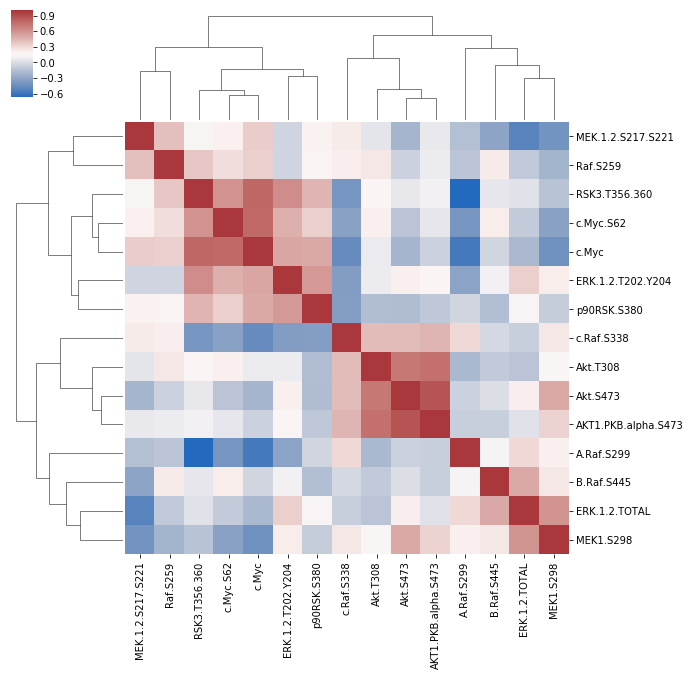

In [161]:
dims = (10, 10)
sns_core = sns.clustermap(to_plot_core, figsize=dims, cmap="vlag")
sns_core.savefig("irem_core.png")

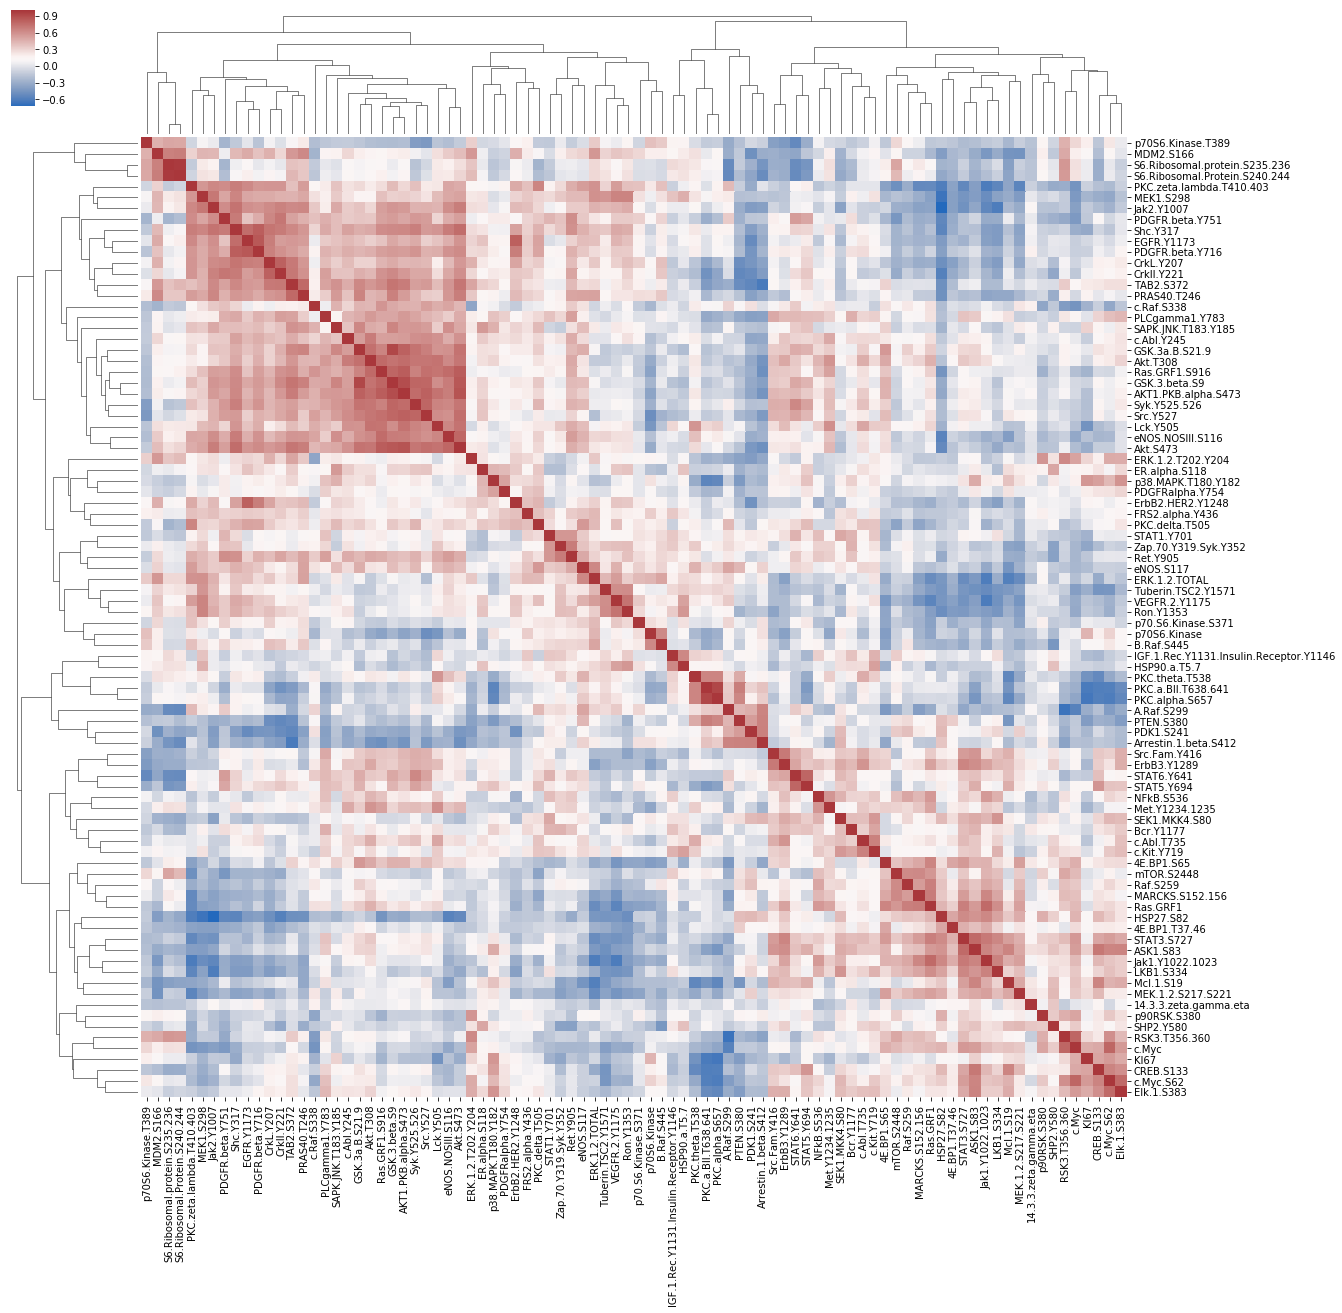

In [162]:
dims = (20, 20)
sns_mapk = sns.clustermap(to_plot_mapk, figsize=dims, cmap="vlag")
sns_mapk.savefig("irem_mapk.png")

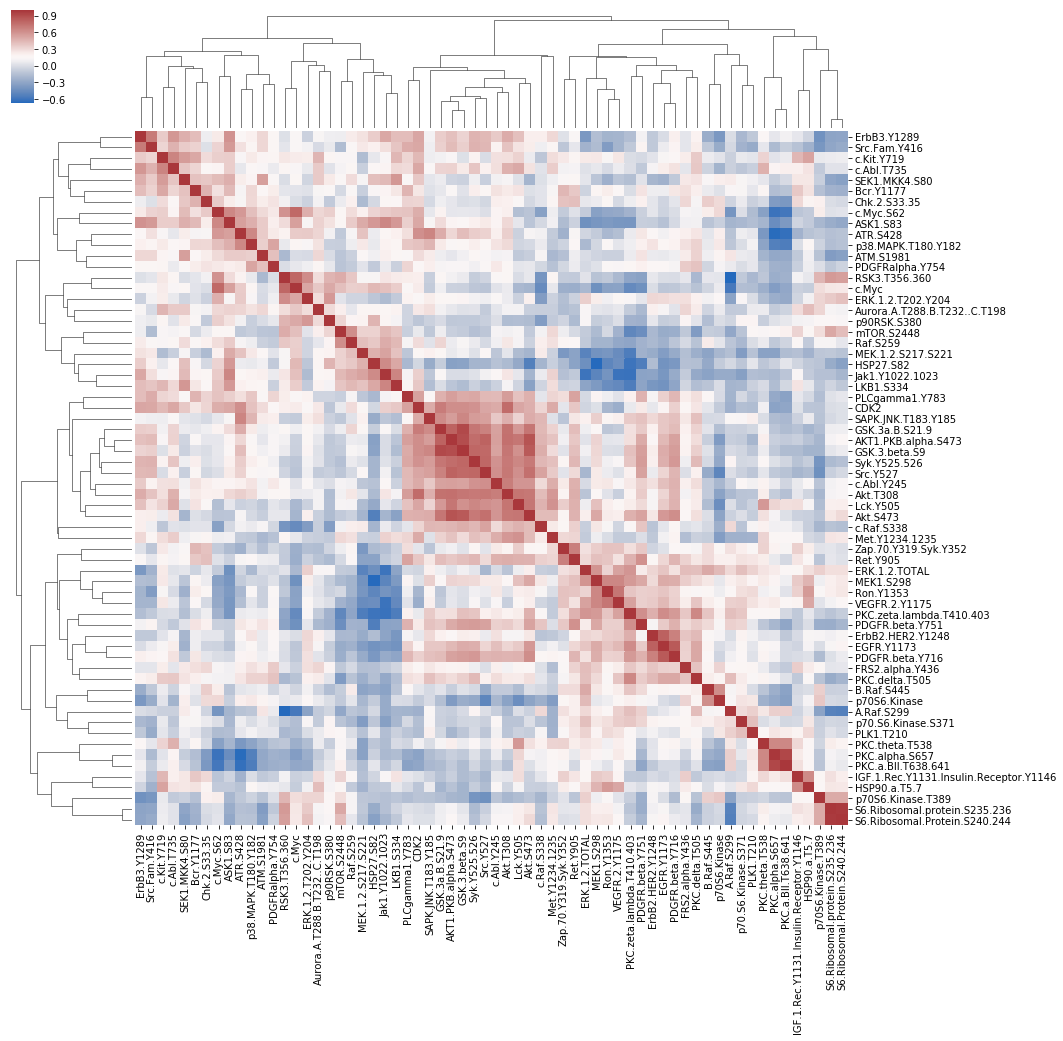

In [163]:
dims = (15, 15)
sns_rtk = sns.clustermap(to_plot_RTK, figsize=dims, cmap="vlag")
sns_rtk.savefig("irem_rtk.png")

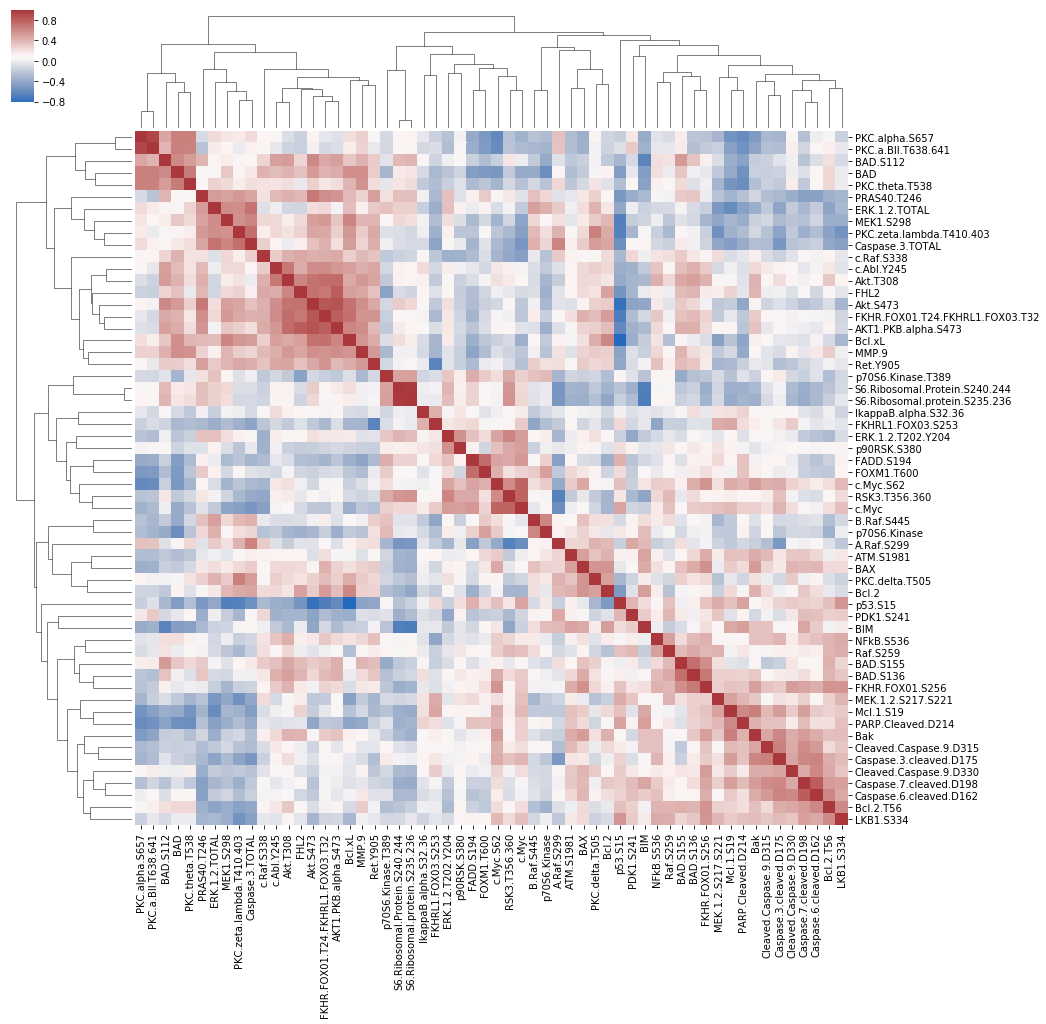

In [164]:
dims = (15, 15)
sns_apoptosis = sns.clustermap(to_plot_apoptosis, figsize=dims, cmap="vlag")
sns_apoptosis.savefig("irem_apoptosis.png")

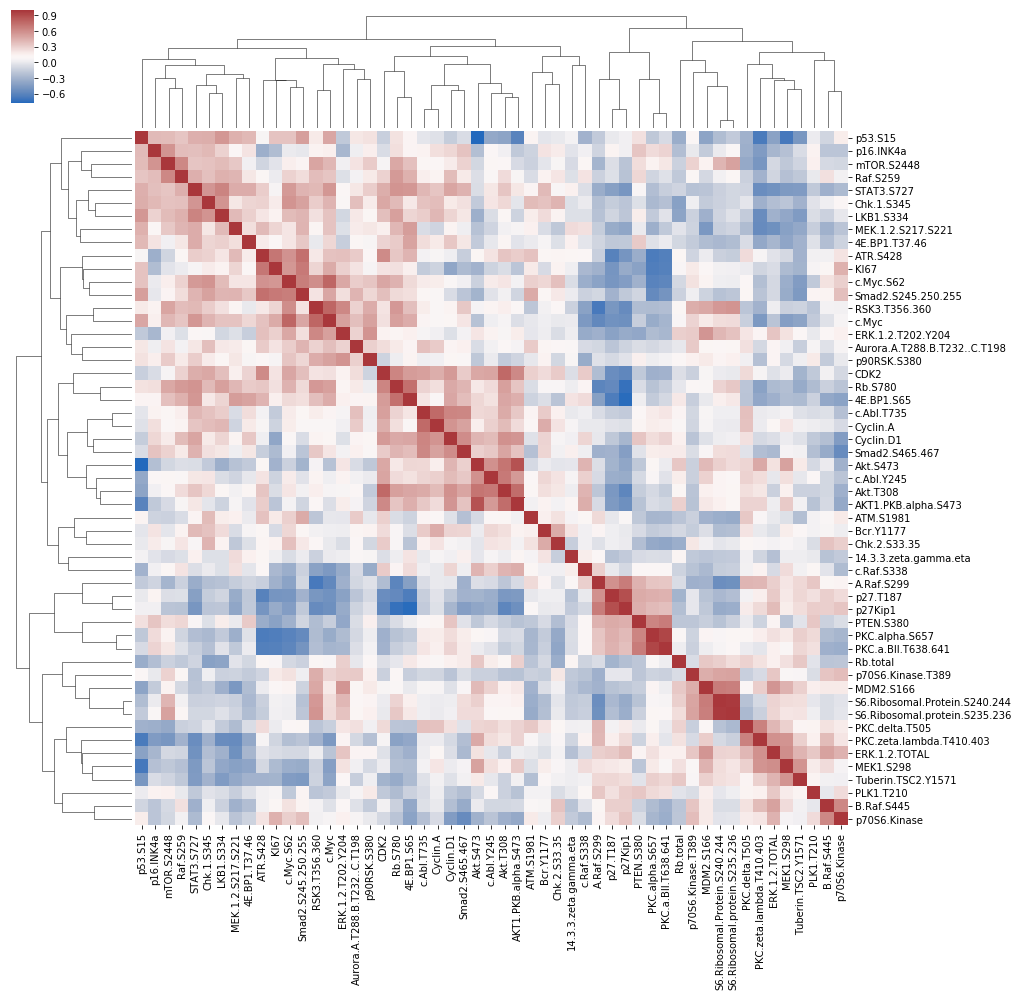

In [165]:
dims = (15, 15)
sns_cell = sns.clustermap(to_plot_cell, figsize=dims, cmap="vlag")
sns_cell.savefig("irem_cell.png")

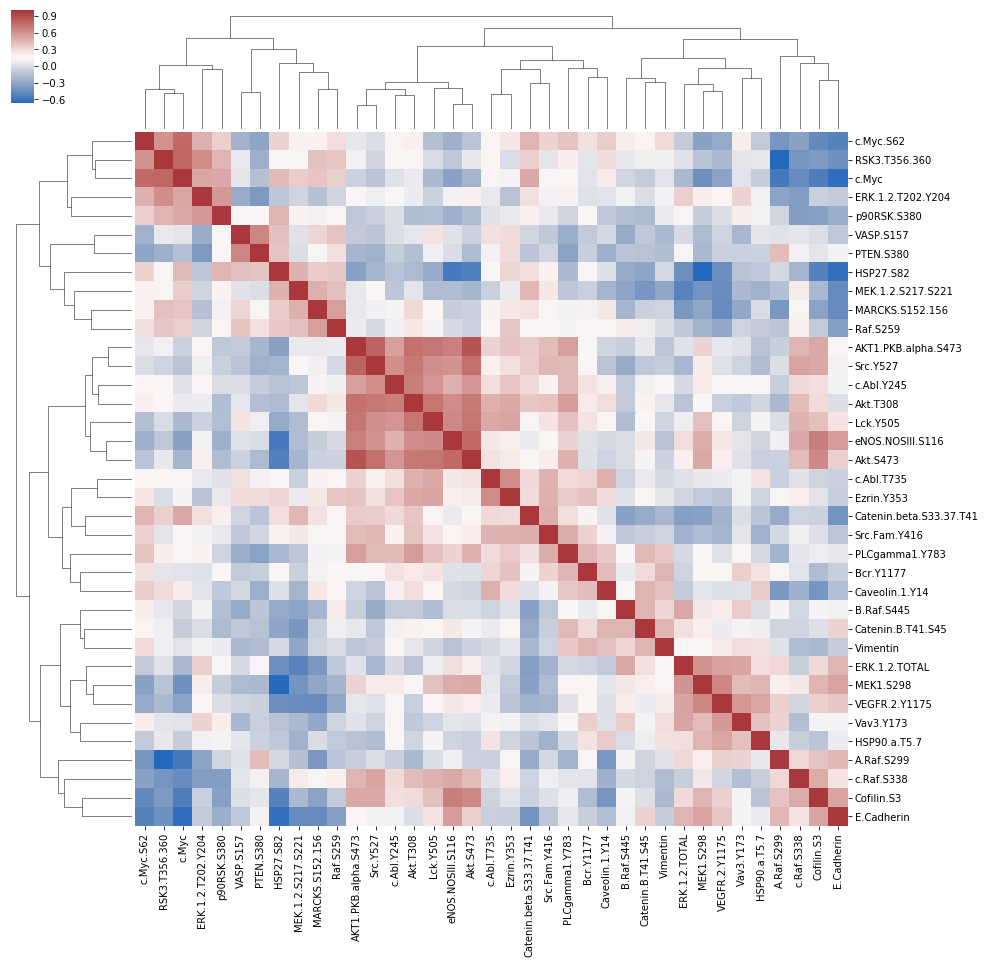

In [166]:
dims = (15, 15)
sns_cyto = sns.clustermap(to_plot_cytoskeleton, figsize=dims, cmap="vlag")
sns_cyto.savefig("irem_cyto.png")

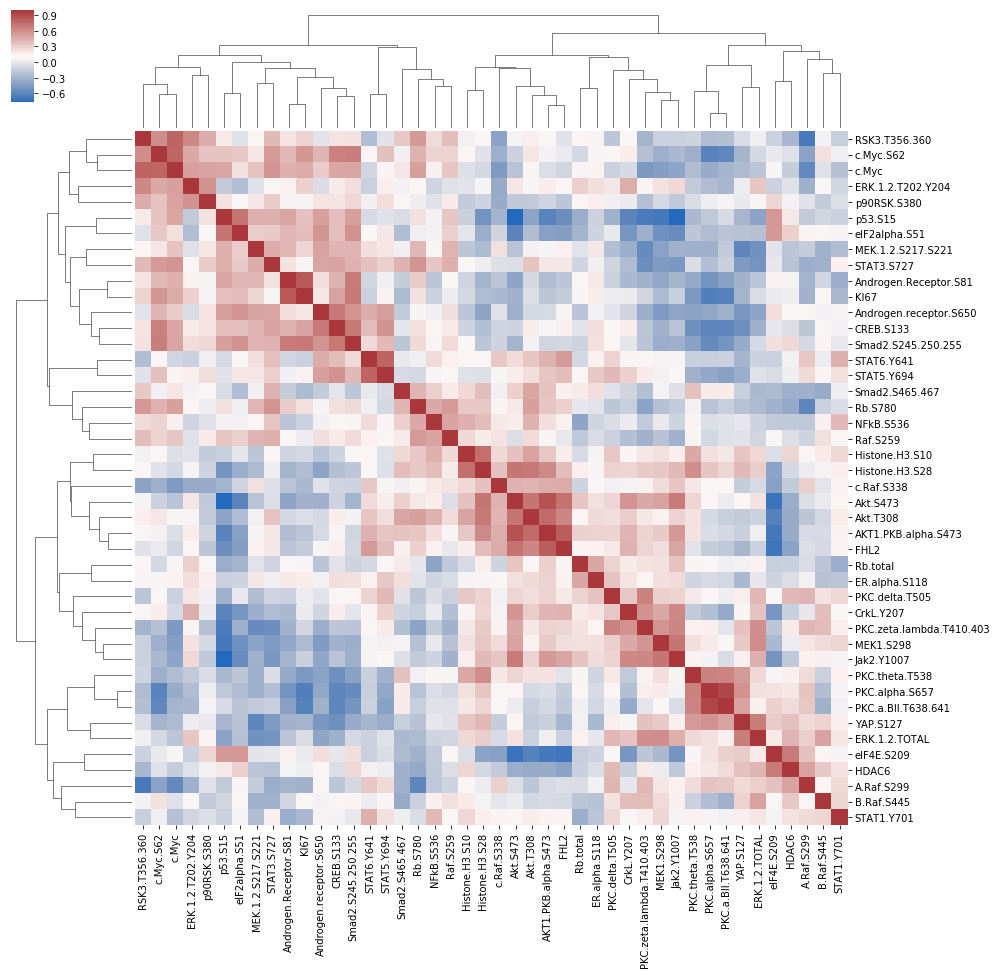

In [167]:
dims = (15, 15)
sns_dna = sns.clustermap(to_plot_dna, figsize=dims, cmap="vlag")
sns_dna.savefig("irem_dna.png")

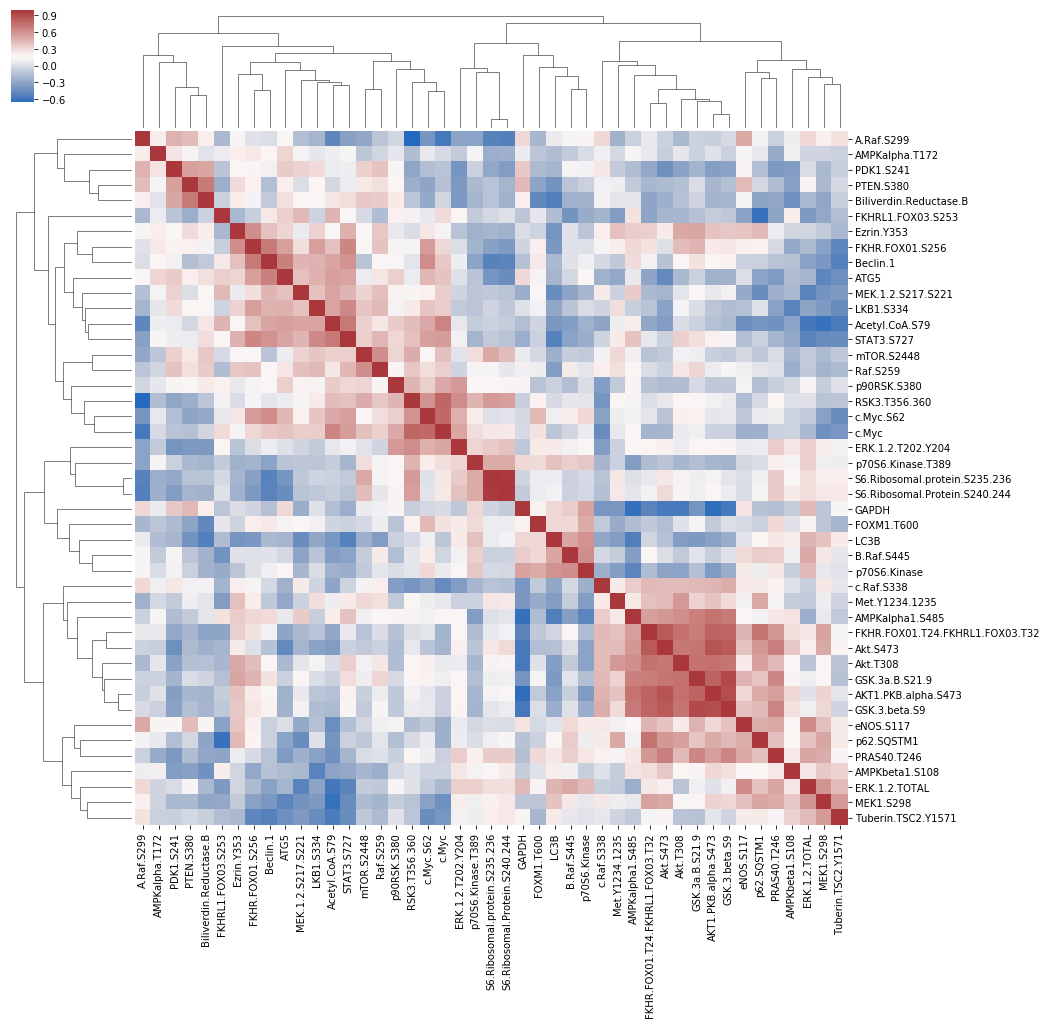

In [168]:
dims = (15, 15)
sns_meta = sns.clustermap(to_plot_metabolism, figsize=dims, cmap="vlag")
sns_meta.savefig("irem_meta.png")

In [ ]:
raw_data_subsets

In [ ]:
dims = (100, 60)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(corr_matrix_spear, ax=ax, cmap=pls)

In [ ]:
corr_matrix_spear.keys()

In [ ]:
corr_matrix_spear["c-Myc "].sort_values(ascending=False)

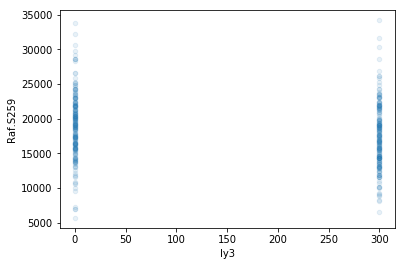

In [16]:
cleaned_data.plot(kind="scatter", x="", y="Raf.S259", alpha=0.1)

In [ ]:
cleaned_data.plot(kind="scatter", x="c-Myc ", y="BAD S136 ", alpha=0.1)

In [ ]:
cleaned_data.plot(kind="scatter", x="c-Myc ", y="A-Raf S299", alpha=0.1)